In [1]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Plotting purposes
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# A. In this question, we work with a simplified version of Heart dataset. 
# Read the dataset file “Heart_short.csv” from github, and assign it to a Pandas DataFrame:
df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")
df

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No
...,...,...,...,...,...,...,...
276,45,110,264,0,132,1.2,Yes
277,68,144,193,0,141,3.4,Yes
278,57,130,131,0,115,1.2,Yes
279,57,130,236,2,174,0.0,Yes


In [4]:
# B. Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.
feature_matrix = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']
X = df[feature_matrix]
y = df['AHD']
X = scale(X)

In [5]:
# C. Split the dataset into testing and training sets with the following parameters: test_size=0.25, random_state=3.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [6]:
# D. Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets 
# that you built in part(c). Then, compute and report the Accuracy.
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print('Logistic Regression Classifier accuracy:', accuracy)

Logistic Regression Classifier accuracy: 0.7183098591549296


In [7]:
# Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing 
# datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than 
# “my_logreg.predict”).
y_predict_prob_lr = logreg.predict_proba(X_test)
print(y_predict_prob_lr)
print(y_predict_prob_lr[:,1])

[[0.49847189 0.50152811]
 [0.55153223 0.44846777]
 [0.39514152 0.60485848]
 [0.39636475 0.60363525]
 [0.8463285  0.1536715 ]
 [0.77042084 0.22957916]
 [0.73485372 0.26514628]
 [0.86548609 0.13451391]
 [0.35529864 0.64470136]
 [0.6707959  0.3292041 ]
 [0.09558374 0.90441626]
 [0.91924811 0.08075189]
 [0.29096442 0.70903558]
 [0.43043601 0.56956399]
 [0.66808153 0.33191847]
 [0.85924791 0.14075209]
 [0.11598482 0.88401518]
 [0.68324451 0.31675549]
 [0.11239963 0.88760037]
 [0.33485811 0.66514189]
 [0.85412798 0.14587202]
 [0.86376748 0.13623252]
 [0.22496489 0.77503511]
 [0.92910529 0.07089471]
 [0.10918691 0.89081309]
 [0.57443365 0.42556635]
 [0.72926897 0.27073103]
 [0.43211917 0.56788083]
 [0.67752917 0.32247083]
 [0.77600088 0.22399912]
 [0.30112704 0.69887296]
 [0.10864797 0.89135203]
 [0.17558051 0.82441949]
 [0.89158205 0.10841795]
 [0.81006702 0.18993298]
 [0.01129614 0.98870386]
 [0.06726456 0.93273544]
 [0.73258706 0.26741294]
 [0.20480859 0.79519141]
 [0.51449134 0.48550866]


In [12]:
# Then, Plot the Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).
# Sklearn label encoder doc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label='Yes')
AUC = metrics.auc(fpr, tpr)
print('The AUC is:', AUC)

The AUC is: 0.7650406504065042


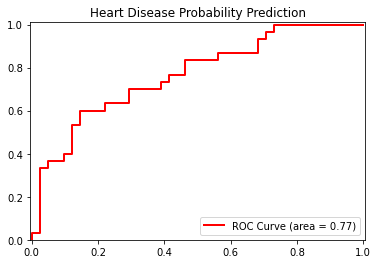

In [14]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.title('Heart Disease Probability Prediction')
plt.legend(loc="lower right")

plt.show()